<a href="https://colab.research.google.com/github/yizhoucc/turtorials/blob/main/notebooks/img2txt_LDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [test] are:
component_manager:
  disable_update_check: 'True'
core:
  account: yizhoucc@gmail.com
  project: all-your-perks

Pick configuration to use:
 [1] Re-initialize this configuration [test] with new settings 
 [2] Create a new configuration
 [3] Switch to and re-initialize existing configuration: [default]
Please enter your numeric choice:  

Command killed by keyboard interrupt

^C


In [ ]:
!gcloud auth login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=8W6wJuZ15aBtzTLOaRq8pTLAsqzk0U&prompt=consent&token_usage=remote&access_type=offline&code_challenge=HgT_hgra8WxNhvPszPM69_HOIRXKPlEV9-CriItKgbM&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 

Command killed by keyboard interrupt

^C


In [ ]:
!pip3 install "google-cloud-aiplatform>=1.38"

In [ ]:
!gcloud config set project all-your-perks


Updated property [core/project].


In [ ]:
!gcloud projects list


PROJECT_ID                  NAME                        PROJECT_NUMBER
all-your-perks              all-your-perks              215849084740
chromatic-theme-264315      My First Project            103169722646
gen-lang-client-0029122620  Generative Language Client  1061914474465
groovy-design-428623-r4     My First Project            958726804800
heroic-throne-428802-v6     My First Project            890240962053


In [ ]:
!gcloud auth application-default set-quota-project all-your-perks


Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "all-your-perks" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the resource.


In [ ]:
import vertexai

from vertexai.generative_models import GenerativeModel, Part

# TODO(developer): Update and un-comment below line
project_id = "all-your-perks"

vertexai.init(project=project_id, location="us-central1")

model = GenerativeModel(model_name="gemini-1.5-flash-001")



The image shows a delicious spread of blueberry biscuits, fresh blueberries, two cups of coffee, and a spoon with the inscription "Let's jam." It looks like a perfect breakfast or brunch setup, with beautiful peonies adding a touch of elegance to the table.


In [ ]:

from vertexai.generative_models import Image

image_url='''
https://encrypted-tbn0.gstatic.com/shopping?q=tbn:ANd9GcT-juUQrr0nr_i0xC6BEBF_Zs4M_p-kxb1jXWnUlmnwhu3wygP02k_kcQDlO4OMZzfjn8Qkd1qoxcR8A3QYglEHK36Smu_uExAD8V3_5Po&usqp=CAE

'''
!curl -o image.jpg ${image_url}
!curl -o image.jpg "https://encrypted-tbn0.gstatic.com/shopping?q=tbn:ANd9GcT-juUQrr0nr_i0xC6BEBF_Zs4M_p-kxb1jXWnUlmnwhu3wygP02k_kcQDlO4OMZzfjn8Qkd1qoxcR8A3QYglEHK36Smu_uExAD8V3_5Po"

image = Image.load_from_file("./image.jpg")



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: $
/bin/bash: line 2: https://encrypted-tbn0.gstatic.com/shopping?q=tbn:ANd9GcT-juUQrr0nr_i0xC6BEBF_Zs4M_p-kxb1jXWnUlmnwhu3wygP02k_kcQDlO4OMZzfjn8Qkd1qoxcR8A3QYglEHK36Smu_uExAD8V3_5Po: No such file or directory
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30660  100 30660    0     0   340k      0 --:--:-- --:--:-- --:--:--  344k


In [ ]:
from PIL import Image as PIL_Image
import requests
from io import BytesIO

# URL of the WebP image
url = "https://encrypted-tbn0.gstatic.com/shopping?q=tbn:ANd9GcT-juUQrr0nr_i0xC6BEBF_Zs4M_p-kxb1jXWnUlmnwhu3wygP02k_kcQDlO4OMZzfjn8Qkd1qoxcR8A3QYglEHK36Smu_uExAD8V3_5Po"

# Send a GET request to the URL
response = requests.get(url)

# Open the image using PIL
image = PIL_Image.open(BytesIO(response.content))

# Save the image as a JPEG
image.save("image.jpg", format="JPEG")

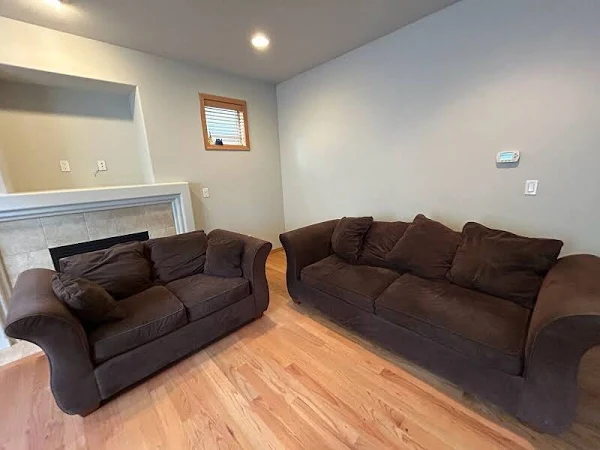

In [ ]:
image

In [ ]:

# Load from local file
image = Image.load_from_file("image.jpg")

# Prepare contents
prompt = "What is shown in this image? whats the color of the item? whats the condition (new/near new/light used/used) of the item? answer these 3 questions in the example format below. item: desk. condition: near new. color: black. "
contents = [image, prompt]
responses = model.generate_content(contents, stream=True)



print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


-------Response--------
item: couch. condition: light used. color: brown. 
